Statistique descriptive : DatasetParMusique


Lecture du dataset depuis un fichier

In [48]:
import json

def lire_dataset_de_fichier(chemin_fichier):
    with open(chemin_fichier, 'r') as fichier:
        # Charger le contenu du fichier et le traiter en tant que JSON
        contenu_json = fichier.read()
        dataset = json.loads(contenu_json)
    return dataset


# Chemin vers le fichier texte contenant le dataset au format JSON
chemin_fichier = 'datasetParMusiques (1).txt'

dataset=lire_dataset_de_fichier(chemin_fichier) #création du dataset


Nombre de morceaux et de notes, notes par morceaux et durée de chaque morceau

In [49]:
def calculer_taille_dataset(dataset):
    nombre_morceaux=len(dataset)
    nombre_note=0
    for track in dataset:
        for note in track[1]:
            nombre_note+=1
    #Chaque morceau est composé de 2 tracks 
    nombre_tracks=2*nombre_morceaux
    return nombre_note,nombre_tracks,nombre_morceaux

def calcul_stats_morceau(morceau):
    durée=0
    nbnote=0
    for note in morceau[1]:
      durée+=note[1]+note[2]
      nbnote+=1
    return durée,nbnote

nombre_note,nombre_tracks,nombre_morceaux=calculer_taille_dataset(dataset)

print(f"Il y a {nombre_morceaux} morceaux")
print(f"Il y a {nombre_tracks} tracks")
print(f"Il y a {nombre_note} notes")

for index, morceau in enumerate(dataset):
    longueur_morceau,nbnote = calcul_stats_morceau(morceau)
    print(f"Longueur du morceau {index + 1}: {longueur_morceau} unités de temps")
    print(f"Nbre de note du morceau {index+1}: {nbnote}")



Il y a 1276 morceaux
Il y a 2552 tracks
Il y a 7040164 notes
Longueur du morceau 1: 2167668 unités de temps
Nbre de note du morceau 1: 8335
Longueur du morceau 2: 851535 unités de temps
Nbre de note du morceau 2: 2531
Longueur du morceau 3: 749343 unités de temps
Nbre de note du morceau 3: 4733
Longueur du morceau 4: 1566291 unités de temps
Nbre de note du morceau 4: 7400
Longueur du morceau 5: 1802094 unités de temps
Nbre de note du morceau 5: 9719
Longueur du morceau 6: 5704911 unités de temps
Nbre de note du morceau 6: 21420
Longueur du morceau 7: 328599 unités de temps
Nbre de note du morceau 7: 1379
Longueur du morceau 8: 1448227 unités de temps
Nbre de note du morceau 8: 4788
Longueur du morceau 9: 1050960 unités de temps
Nbre de note du morceau 9: 2363
Longueur du morceau 10: 2163851 unités de temps
Nbre de note du morceau 10: 7749
Longueur du morceau 11: 489580 unités de temps
Nbre de note du morceau 11: 2111
Longueur du morceau 12: 906971 unités de temps
Nbre de note du morcea

Répartition des notes, de leur durée, des durées avant la note suivante

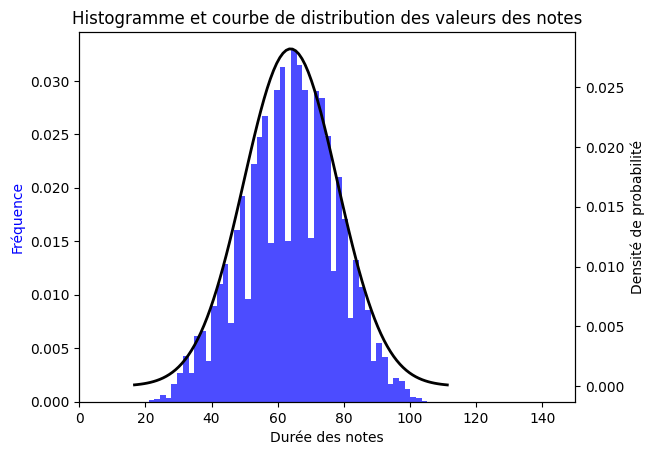

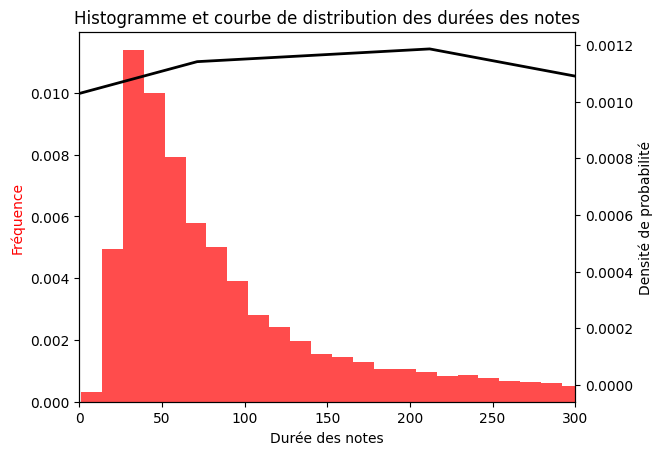

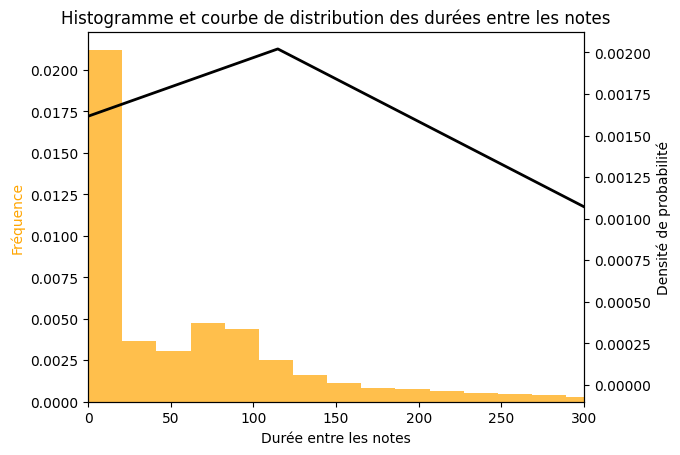

In [22]:
import matplotlib.pyplot as plt
import numpy as np 

def creer_histogramme_valeurs_notes(dataset):
    valeurs_notes = []

    for morceau in dataset:
        for note in morceau[1]:
            valeurs_notes.append(note[0]) 

    fig, ax1 = plt.subplots()

    # Histogramme
    ax1.hist(valeurs_notes, bins=50, color='blue', alpha=0.7, density=True, label='Histogramme')

    # Calculer la densité de probabilité (PDF) de la distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = np.mean(valeurs_notes), np.std(valeurs_notes)
    p = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
    
    # Tracer la courbe de la distribution
    ax2 = ax1.twinx()
    ax2.plot(x, p, 'k', linewidth=2, label='Courbe de distribution')

    # Configurer les axes et les étiquettes
    ax1.set_title('Histogramme et courbe de distribution des valeurs des notes')
    ax1.set_xlabel('Durée des notes')
    ax1.set_ylabel('Fréquence', color='blue')
    ax2.set_ylabel('Densité de probabilité', color='k')

    plt.xlim(0, 150)
    plt.show()

def creer_histogramme_duree_notes(dataset):
    durees_notes = []

    for morceau in dataset:
        for note in morceau[1]:
            durees_notes.append(note[1]) 

    fig, ax1 = plt.subplots()

    # Histogramme
    ax1.hist(durees_notes, bins=1000, color='red', alpha=0.7, density=True, label='Histogramme')

    # Calculer la densité de probabilité (PDF) de la distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = np.mean(durees_notes), np.std(durees_notes)
    p = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
    
    # Tracer la courbe de la distribution
    ax2 = ax1.twinx()
    ax2.plot(x, p, 'k', linewidth=2, label='Courbe de distribution')

    # Configurer les axes et les étiquettes
    ax1.set_title('Histogramme et courbe de distribution des durées des notes')
    ax1.set_xlabel('Durée des notes')
    ax1.set_ylabel('Fréquence', color='red')
    ax2.set_ylabel('Densité de probabilité', color='k')

    plt.xlim(0, 300)
    plt.show()

def creer_histogramme_duree_entre_notes(dataset):
    durees_entre_notes = []

    for morceau in dataset:
        for note in morceau[1]:
            durees_entre_notes.append(note[2]) 

    fig, ax1 = plt.subplots()

    # Histogramme
    ax1.hist(durees_entre_notes, bins=1000, color='orange', alpha=0.7, density=True, label='Histogramme')

    # Calculer la densité de probabilité (PDF) de la distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    mu, std = np.mean(durees_entre_notes), np.std(durees_entre_notes)
    p = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
    
    # Tracer la courbe de la distribution
    ax2 = ax1.twinx()
    ax2.plot(x, p, 'k', linewidth=2, label='Courbe de distribution')

    # Configurer les axes et les étiquettes
    ax1.set_title('Histogramme et courbe de distribution des durées entre les notes')
    ax1.set_xlabel('Durée entre les notes')
    ax1.set_ylabel('Fréquence', color='orange')
    ax2.set_ylabel('Densité de probabilité', color='k')

    plt.xlim(0, 300)
    plt.show()

# Utilisation des fonctions
creer_histogramme_valeurs_notes(dataset)
creer_histogramme_duree_notes(dataset)
creer_histogramme_duree_entre_notes(dataset)

Test du caractère Gaussien : Shapiro-Wilk

In [25]:
from scipy.stats import shapiro

valeurs_notes = []

for morceau in dataset:
    for note in morceau[1]:
        valeurs_notes.append(note[0]) 

durees_notes = []

for morceau in dataset:
    for note in morceau[1]:
        durees_notes.append(note[1])

durees_entre_notes = []

for morceau in dataset:
    for note in morceau[1]:
        durees_entre_notes.append(note[2])

def shapiro_test(data, label):
    stat, p_value = shapiro(data)
    print(f"Test de Shapiro-Wilk pour {label}:")
    print(f"Statistique de test: {stat}")
    print(f"P-value: {p_value}")
    if p_value > 0.05:
        print("La distribution semble normale (p-value > 0.05)")
    else:
        print("La distribution ne semble pas normale (p-value <= 0.05)")
    print("\n")

# Appliquer le test de Shapiro-Wilk
shapiro_test(valeurs_notes, "valeurs des notes")
shapiro_test(durees_notes, "durées des notes")
shapiro_test(durees_entre_notes, "durées entre les notes")

Test de Shapiro-Wilk pour valeurs des notes:
Statistique de test: 0.9955115914344788
P-value: 0.0
La distribution ne semble pas normale (p-value <= 0.05)


Test de Shapiro-Wilk pour durées des notes:
Statistique de test: 0.4051811099052429
P-value: 0.0
La distribution ne semble pas normale (p-value <= 0.05)


Test de Shapiro-Wilk pour durées entre les notes:
Statistique de test: 0.34582090377807617
P-value: 0.0
La distribution ne semble pas normale (p-value <= 0.05)




C:\Users\Pierre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Test de Normalité : G-G plot

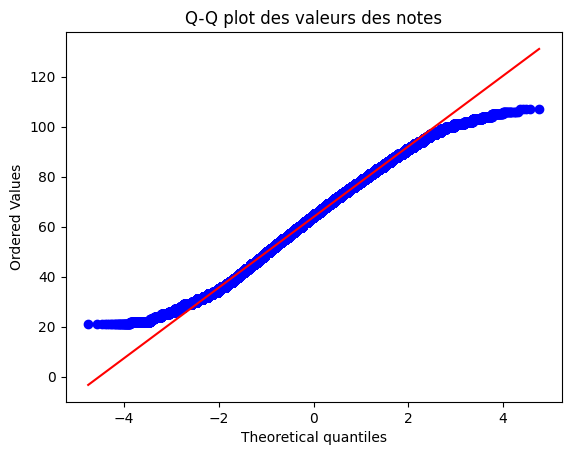

In [31]:
import scipy.stats as stats
import numpy as np

# Exemple avec les valeurs des notes
stats.probplot(valeurs_notes, dist="norm", plot=plt)
plt.title('Q-Q plot des valeurs des notes')
plt.show()

On observe un léger écart a la normalité mais une statistique de test très proche de 1 pour le test de shapiro-wilk et une courbe gaussienne sur l'histogramme de valeur_notes

Notes les plus fréquentes après chaque note : valeur et heatmap

In [32]:
from collections import Counter


def liste_note(dataset):
    liste=[]
    for morceau in dataset:
        for note in morceau[1]:
            liste.append(note[0])
    return liste

liste=liste_note(dataset)
print(liste)

def note_suivante_frequente(liste_notes):
    # Créer une liste de paires de notes consécutives
    paires_notes = list(zip(liste_notes, liste_notes[1:]))
    
    # Utiliser Counter pour compter la fréquence des paires de notes
    compteur_paires = Counter(paires_notes)
    
    # Dictionnaire pour stocker la note suivante la plus fréquente pour chaque note
    note_suivante_frequente = {}
    
    # Parcourir le dictionnaire de compteur_paires
    for paire, frequence in compteur_paires.items():
        note_actuelle, note_suivante = paire
        if note_actuelle not in note_suivante_frequente:
            note_suivante_frequente[note_actuelle] = {'note': note_suivante, 'frequence': frequence}
        elif frequence > note_suivante_frequente[note_actuelle]['frequence']:
            note_suivante_frequente[note_actuelle] = {'note': note_suivante, 'frequence': frequence}
    
    return note_suivante_frequente

liste_notes = liste_note(dataset)
resultat = note_suivante_frequente(liste_notes)

# Afficher le résultat
for note_actuelle, info in resultat.items():
    print(f"Note actuelle: {note_actuelle}, Note suivante la plus fréquente: {info['note']}, Fréquence: {info['frequence']}")


[59, 56, 68, 70, 71, 63, 68, 70, 61, 73, 76, 55, 75, 59, 73, 58, 71, 56, 58, 80, 59, 75, 56, 73, 70, 58, 61, 79, 64, 71, 63, 61, 70, 59, 80, 75, 82, 68, 83, 75, 61, 76, 80, 58, 78, 80, 82, 66, 73, 59, 75, 78, 56, 76, 78, 80, 64, 71, 52, 73, 76, 70, 54, 71, 56, 63, 73, 66, 58, 61, 73, 76, 59, 75, 76, 61, 78, 63, 59, 75, 61, 76, 64, 80, 68, 71, 70, 71, 66, 70, 64, 71, 73, 47, 63, 64, 49, 51, 71, 66, 47, 63, 49, 64, 52, 68, 56, 61, 71, 54, 70, 71, 52, 73, 70, 66, 51, 52, 54, 59, 51, 57, 53, 61, 59, 56, 59, 62, 65, 57, 66, 61, 65, 66, 59, 56, 68, 54, 61, 63, 57, 64, 56, 61, 57, 63, 66, 54, 69, 60, 54, 52, 68, 61, 51, 66, 49, 63, 48, 49, 64, 56, 58, 59, 56, 58, 73, 61, 43, 70, 64, 61, 59, 63, 58, 61, 56, 55, 56, 59, 68, 67, 70, 68, 65, 62, 58, 56, 63, 54, 53, 65, 51, 50, 66, 51, 53, 63, 54, 46, 56, 47, 51, 65, 49, 51, 61, 53, 44, 46, 54, 49, 63, 47, 49, 51, 59, 42, 63, 44, 65, 47, 66, 38, 68, 59, 50, 58, 62, 46, 65, 68, 51, 66, 53, 58, 54, 63, 51, 66, 53, 68, 56, 71, 62, 59, 66, 68, 65, 66,

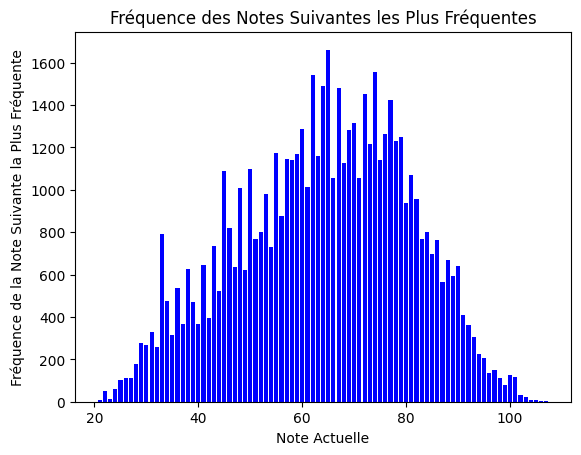

In [33]:
def plot_note_suivante_frequente(resultat):
    notes_actuelles = list(resultat.keys())
    frequences = [info['frequence'] for info in resultat.values()]

    plt.bar(notes_actuelles, frequences, color='blue')
    plt.xlabel('Note Actuelle')
    plt.ylabel('Fréquence de la Note Suivante la Plus Fréquente')
    plt.title('Fréquence des Notes Suivantes les Plus Fréquentes')
    plt.show()


# Afficher l'histogramme
plot_note_suivante_frequente(resultat)

Test de normalité : Q-Q plot

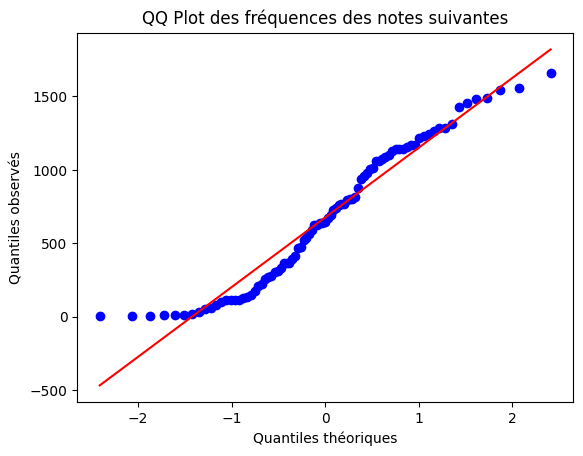

In [36]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

# Parcourir la structure resultat
notes_actuelles = []
frequences_notes_suivantes = []

for note_actuelle, info in resultat.items():
    notes_actuelles.append(note_actuelle)
    frequences_notes_suivantes.append(info['frequence'])

# QQ plot
probplot(frequences_notes_suivantes, dist="norm", plot=plt)
plt.title("QQ Plot des fréquences des notes suivantes")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles observés")
plt.show()

HeatMap des notes suivantes par rapport a une note sous forme de paquet de 10 notes : 

{4: {56: 4497, 68: 2933, 75: 2350, 73: 2529, 71: 3344, 58: 4756, 80: 1380, 61: 4413, 78: 1700, 76: 2291, 63: 4345, 70: 3251, 52: 3492, 54: 3663, 59: 4020, 51: 3255, 57: 4595, 53: 4301, 62: 6717, 66: 3010, 64: 4304, 69: 3650, 55: 5658, 65: 4082, 50: 4092, 46: 2651, 47: 2294, 44: 1850, 49: 2532, 42: 1276, 67: 4210, 43: 2595, 82: 1268, 60: 5373, 48: 2877, 77: 2263, 74: 3468, 72: 3046, 79: 2113, 39: 1237, 83: 1091, 40: 1334, 41: 1654, 36: 507, 38: 1624, 34: 472, 31: 305, 45: 2241, 81: 1490, 37: 427, 93: 236, 89: 511, 88: 581, 86: 956, 84: 953, 91: 404, 24: 15, 27: 55, 32: 238, 92: 246, 87: 550, 33: 323, 90: 373, 85: 739, 30: 125, 94: 156, 95: 146, 35: 309, 29: 166, 28: 66, 25: 21, 99: 51, 98: 61, 100: 69, 26: 57, 96: 120, 101: 43, 97: 84, 103: 19, 22: 20, 21: 4, 102: 17, 105: 1, 106: 3, 23: 4, 104: 5}, 5: {70: 6325, 68: 5318, 73: 4370, 79: 2754, 71: 4970, 61: 5072, 83: 1060, 76: 3262, 58: 6483, 78: 2611, 59: 5540, 80: 2042, 64: 7073, 49: 2223, 47: 1653, 52: 3452, 56: 4895, 51: 3042, 65: 78

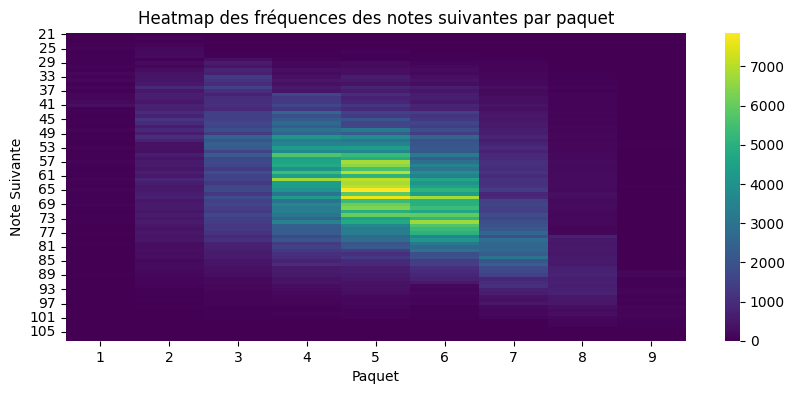

In [43]:
from collections import Counter
import seaborn as sns
import pandas as pd

def regrouper_notes_par_paquets(dataset, taille_paquet=10):
    # Créer une liste de paires de notes consécutives
    paires_notes = [(morceau[1][i][0], morceau[1][i + 1][0]) for morceau in dataset for i in range(len(morceau[1]) - 1)]

    # Utiliser Counter pour compter la fréquence des paires de notes
    compteur_paires = Counter(paires_notes)
    
    # Dictionnaire pour stocker la fréquence de chaque paquet de 10 notes
    paquets_frequences = {}

    # Remplir le dictionnaire avec les fréquences par paquet
    for (note_actuelle, note_suivante), frequence in compteur_paires.items():
        paquet_actuel = (note_actuelle // taille_paquet) - 1  # Ajouter 1 pour commencer à partir de 1
        if paquet_actuel not in paquets_frequences:
            paquets_frequences[paquet_actuel] = {}
        paquets_frequences[paquet_actuel].setdefault(note_suivante, 0)
        paquets_frequences[paquet_actuel][note_suivante] += frequence

    return paquets_frequences

resultat = regrouper_notes_par_paquets(dataset)
print(resultat)

# Convertir en DataFrame
df = pd.DataFrame(resultat)

# Trier les colonnes par paquets
df = df.reindex(sorted(df.columns), axis=1)

# Trier les notes suivantes (ordonnées)
df = df.reindex(sorted(df.index))

# Remplir les valeurs manquantes avec 0
df = df.fillna(0)

# Afficher le DataFrame
print(df)

# Construire la heatmap avec Seaborn
plt.figure(figsize=(10, 4))
sns.heatmap(df, cmap='viridis', fmt='g')
plt.title('Heatmap des fréquences des notes suivantes par paquet')
plt.xlabel('Paquet')
plt.ylabel('Note Suivante')
plt.show()


On voit que lorsque l'on joue une note centrale, la probabilité d'enchainer par une note centrale est forte alors que les notes extremes n'ont pas toujours de note suivante préferentielle, c'est logique puisqu'un 
morceau est classiquement joué dans des octaves assez proches

Utile de vérifier s'il y a des séquences de 3 notes préférentielles ?

Triplet de notes précédentes : (59, 56), Note suivante la plus fréquente : 52, Fréquence : 58
Triplet de notes précédentes : (56, 68), Note suivante la plus fréquente : 56, Fréquence : 65
Triplet de notes précédentes : (68, 70), Note suivante la plus fréquente : 68, Fréquence : 87
Triplet de notes précédentes : (70, 71), Note suivante la plus fréquente : 70, Fréquence : 70
Triplet de notes précédentes : (71, 63), Note suivante la plus fréquente : 66, Fréquence : 52
Triplet de notes précédentes : (63, 68), Note suivante la plus fréquente : 72, Fréquence : 63
Triplet de notes précédentes : (70, 61), Note suivante la plus fréquente : 58, Fréquence : 62
Triplet de notes précédentes : (61, 73), Note suivante la plus fréquente : 61, Fréquence : 133
Triplet de notes précédentes : (73, 76), Note suivante la plus fréquente : 79, Fréquence : 51
Triplet de notes précédentes : (76, 55), Note suivante la plus fréquente : 64, Fréquence : 33
Triplet de notes précédentes : (55, 75), Note suivante la p

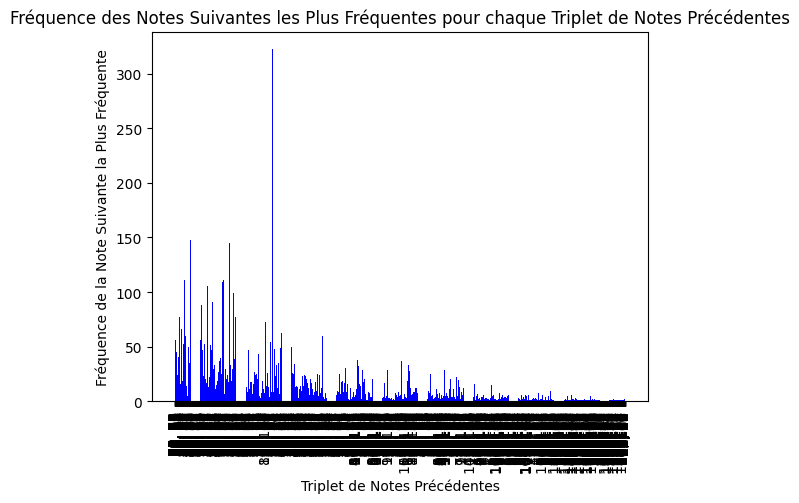

In [47]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

def triplets_notes(dataset):
    triplets = []
    for morceau in dataset:
        notes = morceau[1]
        for i in range(len(notes) - 2):
            triplet = (notes[i][0], notes[i + 1][0], notes[i + 2][0])
            triplets.append(triplet)
    return triplets

def triplet_suivant_frequent(triplets_notes):
    compteur_triplets = Counter(triplets_notes)
    
    triplet_suivant_frequente = {}
    
    for triplet, frequence in compteur_triplets.items():
        note_precedente_1, note_precedente_2, note_suivante = triplet
        if (note_precedente_1, note_precedente_2) not in triplet_suivant_frequente:
            triplet_suivant_frequente[(note_precedente_1, note_precedente_2)] = {'note': note_suivante, 'frequence': frequence}
        elif frequence > triplet_suivant_frequente[(note_precedente_1, note_precedente_2)]['frequence']:
            triplet_suivant_frequente[(note_precedente_1, note_precedente_2)] = {'note': note_suivante, 'frequence': frequence}
    
    return triplet_suivant_frequente

def plot_triplet_suivant_frequent(resultat):
    triplet_precedent = [f"{triplet[0]}, {triplet[1]}" for triplet in resultat.keys()]
    frequences = [info['frequence'] for info in resultat.values()]

    plt.bar(triplet_precedent, frequences, color='blue')
    plt.xlabel('Triplet de Notes Précédentes')
    plt.ylabel('Fréquence de la Note Suivante la Plus Fréquente')
    plt.title('Fréquence des Notes Suivantes les Plus Fréquentes pour chaque Triplet de Notes Précédentes')
    plt.xticks(rotation='vertical')
    plt.show()

# Exemple d'utilisation
chemin_fichier = 'MINI_10_datasetParMusiques (1).txt'
dataset = lire_dataset_de_fichier(chemin_fichier)
triplets = triplets_notes(dataset)
resultat_triplet = triplet_suivant_frequent(triplets)

# Afficher le résultat
for triplet, info in resultat_triplet.items():
    print(f"Triplet de notes précédentes : {triplet}, Note suivante la plus fréquente : {info['note']}, Fréquence : {info['frequence']}")

# Afficher l'histogramme
plot_triplet_suivant_frequent(resultat_triplet)

#On remarque que c'est useless de s'interesser a ça

Beaucoup de triplets possible et pas vraiment de représentation pertinente, on préfère garder l'étude sur un seule note